## Set up

In [57]:
# import libraries
import os
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# display settings
pd.options.display.max_columns = 999
%matplotlib inline
%load_ext nb_black

# for reproducibility
np.random.seed(42)

# project paths
project_root_dir = os.path.normpath(os.getcwd() + os.sep + os.pardir)

data_path = os.path.join(project_root_dir, "data")
os.makedirs(data_path, exist_ok=True)

image_path = os.path.join(project_root_dir, "images")
os.makedirs(image_path, exist_ok=True)


# function for reading data
def read_data(filename, date_cols=None, file_path=data_path):
    csv_path = os.path.join(file_path, filename)
    return pd.read_csv(csv_path, parse_dates=date_cols)


# function for saving data as csv file
def save_dataframe(df, filename, file_path=data_path):
    path = os.path.join(file_path, filename)
    df.to_csv(path, index=False)


The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [58]:
train = read_data("Train.csv")
test = read_data("Test.csv")
submission = read_data("SampleSubmission.csv")

<IPython.core.display.Javascript object>

In [59]:
from data_module import prepare_data

# Note: fit the full pipeline to transform the data
X_train, y_train, X_test, full_pipe = prepare_data(train, test)

<IPython.core.display.Javascript object>

In [60]:
X_train_tr = full_pipe.fit_transform(X_train)
X_test_tr = full_pipe.transform(X_test)

<IPython.core.display.Javascript object>

In [61]:
full_pipe

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['Administrative', 'Administrative_Duration',
                                  'Informational', 'Informational_Duration',
                                  'ProductRelated', 'ProductRelated_Duration',
                                  'BounceRates', 'ExitRates', 'PageValues',
                                  'SpecialDay', 'OperatingSystems', 'Browser',
                                  'Region', 'TrafficType']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                              

<IPython.core.display.Javascript object>

In [62]:
full_pipe.named_transformers_.cat.named_steps.onehotencoder.categories_

[array(['Aug', 'Dec', 'Feb', 'Jul', 'June', 'Mar', 'May', 'Nov', 'Oct',
        'Sep'], dtype=object),
 array(['New_Visitor', 'Other', 'Returning_Visitor'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

<IPython.core.display.Javascript object>

In [63]:
num_cols = X_train.select_dtypes(exclude="object").columns.tolist()
cat_cols = X_train.select_dtypes(include="object").columns.tolist()

# get the list of one-hot encoded categories
ohe_categories = full_pipe.named_transformers_.cat.named_steps.onehotencoder.categories_
# create ohe-hot encoded category column names
new_ohe_features = [
    f"{col}__{val}" for col, vals in zip(cat_cols, ohe_categories) for val in vals
]

# list of all features names
all_features = num_cols + new_ohe_features

<IPython.core.display.Javascript object>

In [64]:
X_train_tr = pd.DataFrame(X_train_tr, columns=all_features)
X_test_tr = pd.DataFrame(X_test_tr, columns=all_features)

<IPython.core.display.Javascript object>

In [65]:
X_train_tr.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Month__Aug,Month__Dec,Month__Feb,Month__Jul,Month__June,Month__Mar,Month__May,Month__Nov,Month__Oct,Month__Sep,VisitorType__New_Visitor,VisitorType__Other,VisitorType__Returning_Visitor,Weekend__No,Weekend__Yes
0,0.0,0.0,0.0,0.0,5.0,81.083333,0.04,0.050000,0.0,0.0,3.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,3.0,189.000000,0.00,0.066667,0.0,0.0,3.0,2.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,132.0,8.0,445.000000,0.00,0.014286,0.0,0.0,3.0,2.0,4.0,14.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,3.0,0.000000,0.20,0.200000,0.0,0.0,1.0,8.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,4.0,14.000000,0.10,0.150000,0.0,0.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


<IPython.core.display.Javascript object>

In [66]:
X_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
id,,,,,,,,,,,,,,,,,
1,0,0.0,0,0.0,5,81.083333,0.04,0.050000,0.0,0.0,Dec,3,2,1,2,New_Visitor,No
2,0,0.0,0,0.0,3,189.000000,0.00,0.066667,0.0,0.0,Mar,3,2,8,1,Returning_Visitor,No
3,0,0.0,1,132.0,8,445.000000,0.00,0.014286,0.0,0.0,Mar,3,2,4,14,Returning_Visitor,Yes
4,0,0.0,0,0.0,3,0.000000,0.20,0.200000,0.0,0.0,Mar,1,8,2,1,Returning_Visitor,No
5,0,0.0,0,0.0,4,14.000000,0.10,0.150000,0.0,0.0,Mar,3,2,1,1,Returning_Visitor,No


<IPython.core.display.Javascript object>

## Model Interpretation

## Permutation Importance

In [67]:
from sklearn.model_selection import train_test_split

X_train_tr, X_valid_tr, y_train, y_valid = train_test_split(
    X_train_tr, y_train, test_size=0.25, random_state=42, stratify=y_train
)

<IPython.core.display.Javascript object>

In [68]:
# random forest model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    max_depth=12,
    min_samples_leaf=3,
    min_samples_split=3,
    n_estimators=443,
    random_state=42,
)

rf_clf.fit(X_train_tr, y_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=3, min_samples_split=3,
                       n_estimators=443, random_state=42)

<IPython.core.display.Javascript object>

In [69]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf_clf, random_state=42)
perm.fit(X_valid_tr, y_valid)
eli5.show_weights(perm, feature_names=all_features)

Weight,Feature
0.1171 ± 0.0067,PageValues
0.0054 ± 0.0033,ExitRates
0.0044 ± 0.0055,Month__Nov
0.0032 ± 0.0026,ProductRelated_Duration
0.0029 ± 0.0022,BounceRates
0.0015 ± 0.0052,ProductRelated
0.0013 ± 0.0021,Month__Dec
0.0012 ± 0.0025,Month__May
0.0010 ± 0.0018,VisitorType__New_Visitor
0.0005 ± 0.0006,Month__Sep


<IPython.core.display.Javascript object>

The `top 6` most important feature of the model is `Page values`, `Exit Rates`, `Month_Nov`, `Product related duration`, `Bounce Rates`, `Product related`. Apart from the month of `Nov` some other important months are `Dec` and `May`, also `new visitor` is more important than the `returning visitor`. These results are consistent with our initial eda analysis.  

## Decision Tree visualization

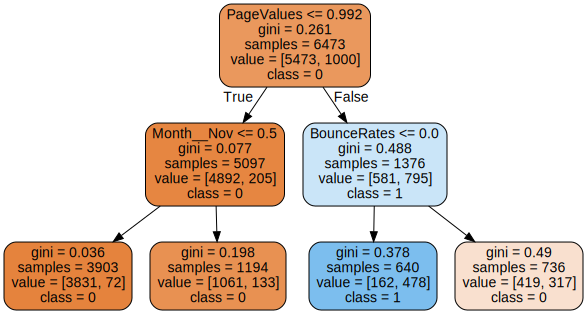

<IPython.core.display.Javascript object>

In [70]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from graphviz import Source

tree_clf = DecisionTreeClassifier(random_state=42, max_depth=2)
tree_clf.fit(X_train_tr, y_train)

tree_graph = tree.export_graphviz(
    tree_clf,
    out_file=os.path.join(image_path, "decision_tree_new.png"),
    feature_names=all_features,
    filled=True,
    rounded=True,
    class_names=["0", "1"],
)
Source.from_file(os.path.join(image_path, "decision_tree_new.png"))

Here, first the decision tree in the root node(depth 0 at top) asks, whether the `Page value <= $1 ?`, if it is then the decision tree asks another question at depth 1 at left, whether the `month is Nov or Not` in `either case` all the instances are classified as `class 0`. Overall if the `page value <= $1` then the decision tree predict that the customer will `not buy` from the online website. If the `page value > $1` then the decision tree again ask another question in the right node at depth 1, whether the `Bounce Rate <= 0` if it is then the decision tree predicts that the customers belongs to `class 1` means that the customer `will buy` from the website and `if not` then the customer will `not buy` from the website. 

Overall, the decision tree predict that a customer belongs to `class 1` that they will buy if they satisfy both the conditions that they have a `page value > $1` and the `bounce rate <= 0`. 

## SHAP Values

In [71]:
X_valid_tr = X_valid_tr.reset_index().drop("index", axis=1)
y_valid = y_valid.reset_index().drop("id", axis=1)

<IPython.core.display.Javascript object>

In [72]:
pd.DataFrame(X_valid_tr.iloc[999]).T

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Month__Aug,Month__Dec,Month__Feb,Month__Jul,Month__June,Month__Mar,Month__May,Month__Nov,Month__Oct,Month__Sep,VisitorType__New_Visitor,VisitorType__Other,VisitorType__Returning_Visitor,Weekend__No,Weekend__Yes
999,0.0,0.0,0.0,0.0,39.0,1183.5,0.012821,0.033333,0.0,0.0,2.0,2.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


<IPython.core.display.Javascript object>

In [73]:
y_valid.iloc[999]

target    0
Name: 999, dtype: int64

<IPython.core.display.Javascript object>

In [74]:
rf_clf.predict_proba([X_valid_tr.iloc[999]])

array([[0.9938284, 0.0061716]])

<IPython.core.display.Javascript object>

In [75]:
import shap

<IPython.core.display.Javascript object>

In [76]:
# create a tree explainer object
explainer = shap.TreeExplainer(rf_clf)
# calculate shap values
shap_values = explainer.shap_values(X_valid_tr)

<IPython.core.display.Javascript object>

In [77]:
len(shap_values)

2

<IPython.core.display.Javascript object>

In [78]:
# length of all negative outcomes
len(shap_values[0])

2158

<IPython.core.display.Javascript object>

In [79]:
# length of all positive outcomes
len(shap_values[1])

2158

<IPython.core.display.Javascript object>

In [80]:
# len of first negative outcomes
len(shap_values[0][0])

29

<IPython.core.display.Javascript object>

In [81]:
# shap values for first positive outcomes
shap_values[1][0]

array([-8.54729693e-03, -1.65905658e-02,  7.49639660e-04,  9.14486326e-04,
        1.68856287e-02,  2.58950972e-03, -5.34263981e-02, -2.10329315e-02,
        1.63657203e-01,  1.14204458e-03, -1.72481934e-03, -2.66240971e-03,
        3.24431054e-04, -6.77508745e-05, -3.20611722e-04,  2.78957811e-03,
        2.25364501e-05, -7.88991621e-04, -1.95197810e-05,  6.15757891e-04,
        7.51028497e-03, -2.77566833e-02, -2.85723841e-04,  6.05334222e-03,
       -2.49471398e-03, -7.12227271e-06, -3.75145746e-03, -3.26930834e-04,
       -7.41395842e-04])

<IPython.core.display.Javascript object>

## Local Interpretation

### Why the model thinks that this customer will not buy, P(buy=0.006) ? 

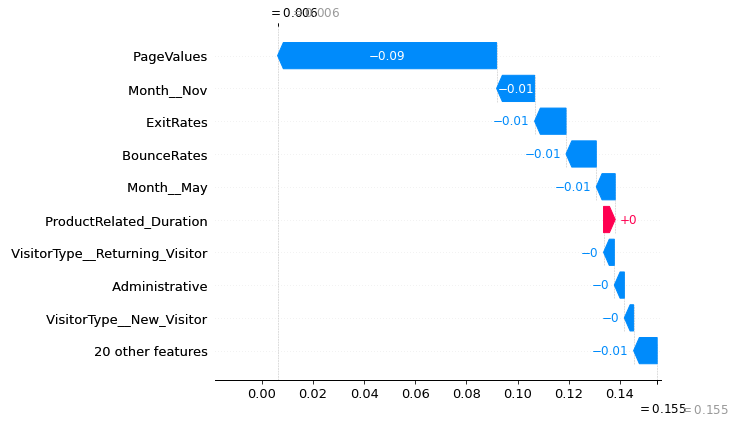

<IPython.core.display.Javascript object>

In [82]:
shap.plots._waterfall.waterfall_legacy(
    expected_value=explainer.expected_value[1],
    shap_values=shap_values[1][999],
    features=X_valid_tr.iloc[999],
    feature_names=all_features,
)

On average, the probability that a customer will buy from the online shop is `15.5%`, and the probability that this particular customer will buy is `0.6%`. The reason for this is that the `Page value for this customer is $0`, which `reduce the probabilty of buying by 9%`. The `month is not Nov`, `Exit Rate of 3.3%` and `bounce rate of 1.3%` and `Month is May`, further decrease the probability of buying by `1% each` from the expected probability value.

### Why the model thinks that this customer will buy, P(buy=0.868) ?

In [83]:
y_prob = rf_clf.predict_proba(X_valid_tr)

<IPython.core.display.Javascript object>

In [84]:
np.where(y_prob[:, 1] > 0.5)

(array([   3,   11,   24,   38,   45,   66,   71,   72,   80,   95,  117,
         160,  166,  168,  171,  188,  191,  196,  198,  216,  218,  219,
         234,  236,  238,  246,  247,  251,  259,  275,  279,  284,  299,
         312,  336,  340,  356,  365,  367,  379,  393,  400,  404,  405,
         428,  429,  446,  473,  475,  479,  500,  505,  506,  508,  525,
         531,  535,  541,  546,  551,  573,  579,  583,  584,  599,  609,
         635,  637,  646,  648,  649,  657,  670,  673,  687,  713,  714,
         717,  718,  720,  733,  741,  742,  747,  749,  755,  807,  826,
         827,  829,  849,  852,  864,  874,  878,  879,  893,  897,  900,
         926,  931,  945,  947,  950,  956,  980,  994,  995, 1012, 1034,
        1035, 1042, 1044, 1051, 1060, 1065, 1070, 1075, 1076, 1099, 1100,
        1103, 1104, 1118, 1127, 1135, 1141, 1142, 1150, 1157, 1159, 1177,
        1192, 1205, 1218, 1224, 1227, 1268, 1272, 1280, 1295, 1307, 1322,
        1335, 1337, 1353, 1364, 1368, 

<IPython.core.display.Javascript object>

In [85]:
y_prob[24, :]

array([0.13249537, 0.86750463])

<IPython.core.display.Javascript object>

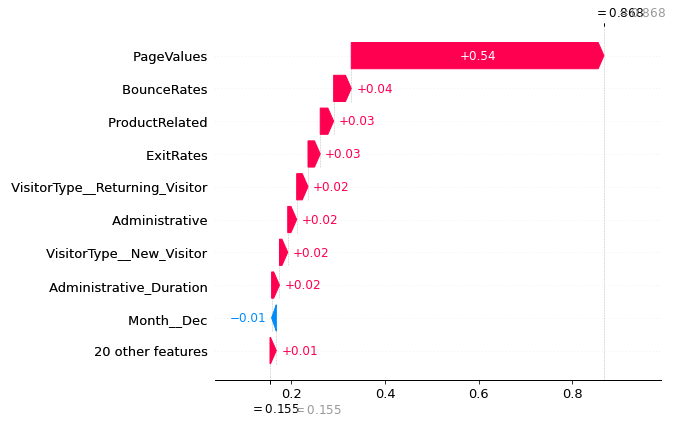

<IPython.core.display.Javascript object>

In [86]:
shap.plots._waterfall.waterfall_legacy(
    expected_value=explainer.expected_value[
        1
    ],  # expected value of buying or positive class
    shap_values=shap_values[1][24],  # shap value for customer whose index is 24
    features=X_valid_tr.iloc[24],  # feature values for customer whose index is 24
    feature_names=all_features,  # feature names
)

This customer has a `page value of $288` which increases the probability of buying alone by `54%`, the `bounce rate of 0` also increases the probability by `4%`. The `ProductRelated(=12)`, `Exit Rate(=0.017)` both increases the probability by `3%` and `so on`. 

## Global Interpretation

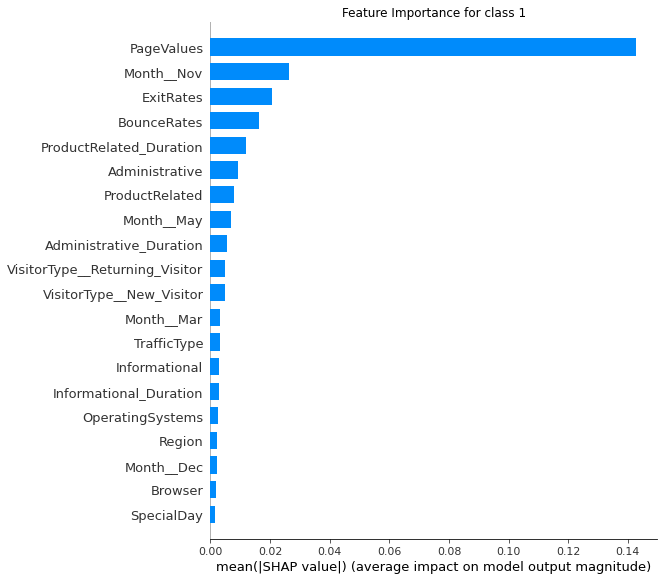

<IPython.core.display.Javascript object>

In [87]:
# feature importance
shap.summary_plot(
    shap_values[1],
    features=X_valid_tr,
    feature_names=all_features,
    plot_type="bar",
    show=False,
)
plt.title("Feature Importance for class 1")
plt.show()

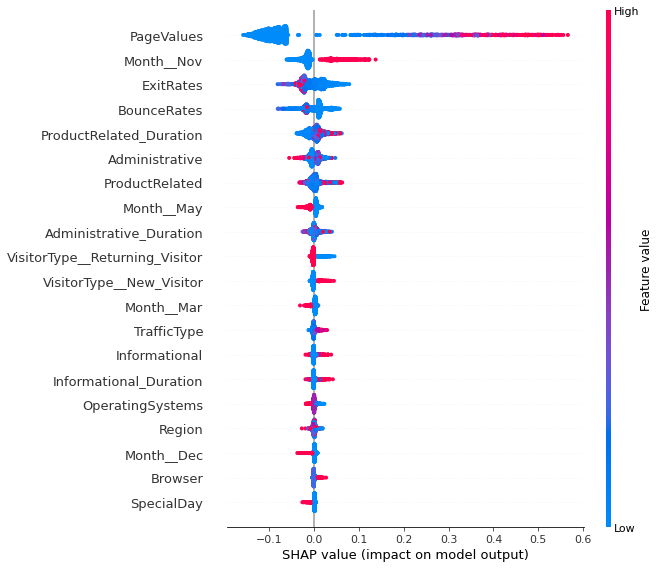

<IPython.core.display.Javascript object>

In [88]:
shap.summary_plot(shap_values[1], features=X_valid_tr, feature_names=all_features)

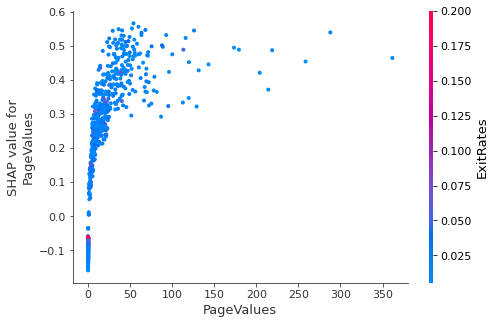

<IPython.core.display.Javascript object>

In [89]:
shap.dependence_plot(
    "PageValues",
    shap_values=shap_values[1],
    features=X_valid_tr,
    feature_names=all_features,
)

As we can see that as the `Page Value` increases the shap values for page value also increase that is the probability that someone will buy also increases and after a certain point the plot becomes flat means the page value stop influencing the outcome. The negative shap values means it decreases the probability that a customer will buy from the website. And the feature that interact most with the page values is `Exit Rates`. A lower value of exit rates leads to higher probability that the customer will buy and vice-versa.

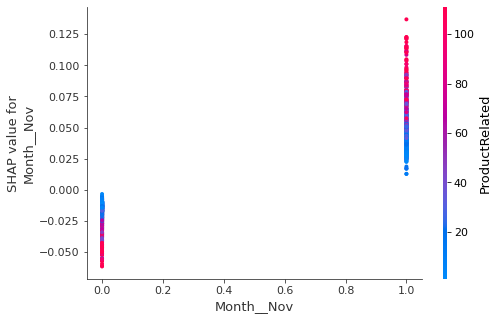

<IPython.core.display.Javascript object>

In [90]:
shap.dependence_plot(
    "Month__Nov",
    shap_values=shap_values[1],
    features=X_valid_tr,
    feature_names=all_features,
)

When the `month is No`v the probability that someone will buy `is higher` than when it's `not Nov` as (Month_Nov=1) has higher shap values. The product related feature interacts most with the Month Nov. Higher value of product related results in higher positive outcome when the month is nov but it flips when the month is not nov. 

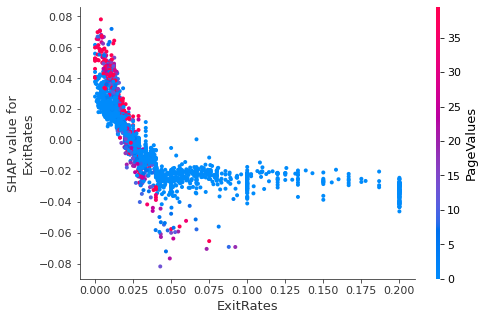

<IPython.core.display.Javascript object>

In [91]:
shap.dependence_plot(
    "ExitRates",
    shap_values=shap_values[1],
    features=X_valid_tr,
    feature_names=all_features,
)

There is a `negative relationship` between the `exit rate` and the probability that someone `will buy`. `Higher` the value of it the `lower` will be the probability that someone will buy from the website. We can also see that `page values` interacts most with the `exit rates`. A customer has higher page value when it has lower exit rates and when the exit rates is too high the page value becomes the lowest. 

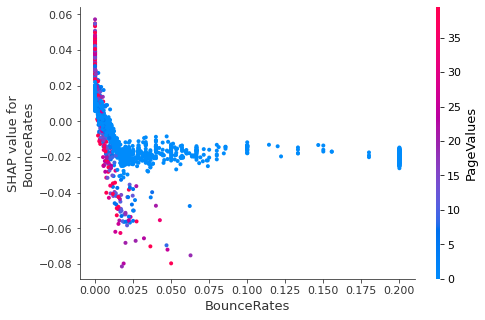

<IPython.core.display.Javascript object>

In [92]:
shap.dependence_plot(
    "BounceRates",
    shap_values=shap_values[1],
    features=X_valid_tr,
    feature_names=all_features,
)

This feature is also have negative relationship with the positive class. If we look at the shap values for the negative class 0, the relationship wll reverse.

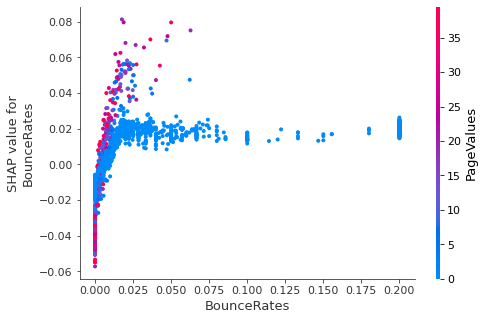

<IPython.core.display.Javascript object>

In [93]:
# Bounce rate shap values for the negative class
shap.dependence_plot(
    "BounceRates",
    shap_values=shap_values[0],
    features=X_valid_tr,
    feature_names=all_features,
)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


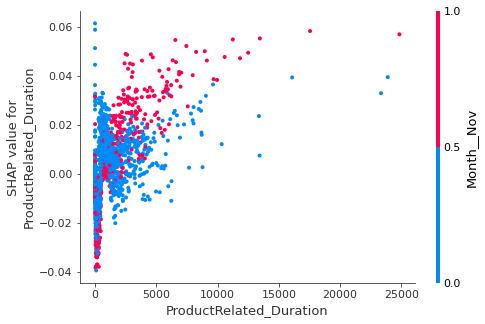

<IPython.core.display.Javascript object>

In [94]:
shap.dependence_plot(
    "ProductRelated_Duration",
    shap_values=shap_values[1],
    features=X_valid_tr,
    feature_names=all_features,
)

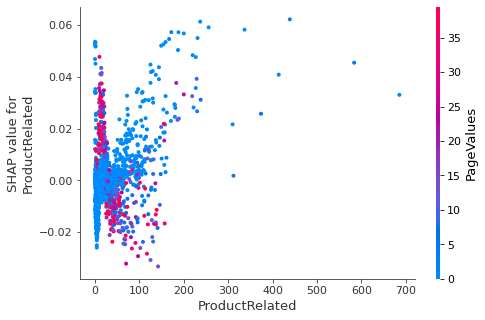

<IPython.core.display.Javascript object>

In [95]:
shap.dependence_plot(
    "ProductRelated",
    shap_values=shap_values[1],
    features=X_valid_tr,
    feature_names=all_features,
)

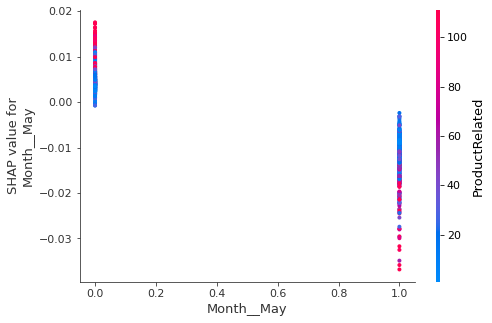

<IPython.core.display.Javascript object>

In [96]:
shap.dependence_plot(
    "Month__May",
    shap_values=shap_values[1],
    features=X_valid_tr,
    feature_names=all_features,
)

Probability of buying is higher when month is not may and lower when month is may. Which we found during eda.

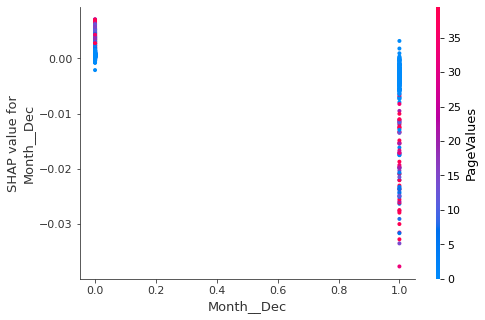

<IPython.core.display.Javascript object>

In [97]:
shap.dependence_plot(
    "Month__Dec",
    shap_values=shap_values[1],
    features=X_valid_tr,
    feature_names=all_features,
)

This is same for the month of Dec also. As in `December`, `May`, and in `March` the percentage of traffic was high but the conversion percentage was lower that is why the model is giving lower probability that a customer will buy compared to the month of `November` where visitor percentage was less but the conversion percentage was higher that is why the model is giving higher probability of conversion. 

## Model with only most important features

In [98]:
cols = [
    "PageValues",
    "ExitRates",
    "ProductRelated",
    "ProductRelated_Duration",
    "BounceRates",
    "VisitorType__New_Visitor",
    "VisitorType__Returning_Visitor",
    "VisitorType__Other",
    "Month__Aug",
    "Month__Dec",
    "Month__Feb",
    "Month__Jul",
    "Month__June",
    "Month__Mar",
    "Month__May",
    "Month__Nov",
    "Month__Oct",
    "Month__Sep",
]

<IPython.core.display.Javascript object>

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_clf = RandomForestClassifier(random_state=42)
scores = cross_val_score(rf_clf, X_train_tr[cols], y_train, cv=5, scoring="f1_macro")
print("Scores:", scores)
print("Average score:", np.mean(scores))

Scores: [0.79954151 0.80045151 0.79616033 0.80873813 0.78314676]
Average score: 0.7976076490409583


<IPython.core.display.Javascript object>

In [100]:
rf_clf.fit(X_train_tr[cols], y_train)
y_pred = rf_clf.predict(X_test_tr[cols])
submission["revenue"] = y_pred
save_dataframe(submission, "rf_imp_features1.csv")

<IPython.core.display.Javascript object>

Even with so less features, the model is making good predictions. The score is very close to the previous found best model. let's do a quick hyperparameter tunning.

In [101]:
# only select the most important features
X_train_tr = X_train_tr[cols].copy()
X_test_tr = X_test_tr[cols].copy()
# convert seconds to minutes
X_train_tr["ProductRelated_Duration"] = X_train_tr["ProductRelated_Duration"] / 60

<IPython.core.display.Javascript object>

In [102]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

param_dist = {
    "n_estimators": randint(low=100, high=1000),
    "max_depth": randint(low=3, high=15),
    "min_samples_split": randint(low=2, high=20),
    "min_samples_leaf": randint(low=1, high=10),
    "max_features": ["auto", "sqrt", "log2"],
}

rf_clf = RandomForestClassifier(random_state=42, oob_score=True)

rf_rnd_search = RandomizedSearchCV(
    rf_clf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="f1_macro",
    random_state=42,
)

rf_rnd_search.fit(X_train_tr, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(oob_score=True,
                                                    random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1491ffaf0>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1491ff700>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1491ff460>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1491ffdf0>},
                   random_state=42, scoring='f1_macro')

<IPython.core.display.Javascript object>

In [103]:
rf_rnd_search.best_score_

0.803844302487937

<IPython.core.display.Javascript object>

In [104]:
rf_rnd_search.best_params_

{'max_depth': 13,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 13,
 'n_estimators': 666}

<IPython.core.display.Javascript object>

In [105]:
# make final predictions
y_pred = rf_rnd_search.best_estimator_.predict(X_test_tr)
submission["revenue"] = y_pred
save_dataframe(submission, "rf_imp_features_final1.csv")

<IPython.core.display.Javascript object>

In [106]:
np.where(X_train_tr.columns == "Month__Nov")[0][0]

15

<IPython.core.display.Javascript object>

In [107]:
def predict_purchase_intension(
    PageValues,
    ExitRates,
    ProductRelated,
    ProductRelated_Duration,
    BounceRates,
    VisitorType,
    Month,
):

    visitor_type_index = np.where(X_train_tr.columns == VisitorType)[0][0]
    month_index = np.where(X_train_tr.columns == Month)[0][0]

    x = np.zeros(len(X_train_tr.columns))
    x[0] = PageValues
    x[1] = ExitRates
    x[2] = ProductRelated
    x[3] = ProductRelated_Duration
    x[4] = BounceRates
    x[visitor_type_index] = 1
    x[month_index] = 1

    return print("class:", rf_rnd_search.best_estimator_.predict([x])[0])

<IPython.core.display.Javascript object>

In [108]:
X_train_tr.describe().T

,count,mean,std,min,25%,50%,75%,max
PageValues,6473.0,5.820390,18.028168,0.0,0.000000,0.00000,0.000000,360.953384
ExitRates,6473.0,0.042123,0.047312,0.0,0.014259,0.02500,0.050000,0.200000
ProductRelated,6473.0,31.751120,44.447772,0.0,7.000000,18.00000,38.000000,705.000000
ProductRelated_Duration,6473.0,19.905726,30.169598,0.0,3.080556,10.14000,24.722222,719.520556
BounceRates,6473.0,0.021284,0.046849,0.0,0.000000,0.00303,0.016667,0.200000
VisitorType__New_Visitor,6473.0,0.138885,0.345853,0.0,0.000000,0.00000,0.000000,1.000000
VisitorType__Returning_Visitor,6473.0,0.853854,0.353279,0.0,1.000000,1.00000,1.000000,1.000000
VisitorType__Other,6473.0,0.007261,0.084908,0.0,0.000000,0.00000,0.000000,1.000000
Month__Aug,6473.0,0.035069,0.183968,0.0,0.000000,0.00000,0.000000,1.000000
Month__Dec,6473.0,0.139348,0.346336,0.0,0.000000,0.00000,0.000000,1.000000


<IPython.core.display.Javascript object>

In [109]:
predict_purchase_intension(
    5, 0.20, 10, 5, 0.30, "VisitorType__New_Visitor", "Month__Nov"
)

class: 0


<IPython.core.display.Javascript object>

### Save the model

In [110]:
import joblib

model_path = os.path.join(project_root_dir, "models")
os.makedirs(model_path, exist_ok=True)


def save_model(model, model_name, path=model_path):
    path = os.path.join(model_path, model_name)
    joblib.dump(model, path)


save_model(rf_rnd_search.best_estimator_, "rf_rnd_search1.joblib")

<IPython.core.display.Javascript object>

### Export column information

In [111]:
import json

path = os.path.join(model_path, "columns.json")
columns = {"data_columns": [col for col in X_train_tr.columns]}

with open(path, "w") as f:
    f.write(json.dumps(columns))

<IPython.core.display.Javascript object>

In [112]:
columns

{'data_columns': ['PageValues',
  'ExitRates',
  'ProductRelated',
  'ProductRelated_Duration',
  'BounceRates',
  'VisitorType__New_Visitor',
  'VisitorType__Returning_Visitor',
  'VisitorType__Other',
  'Month__Aug',
  'Month__Dec',
  'Month__Feb',
  'Month__Jul',
  'Month__June',
  'Month__Mar',
  'Month__May',
  'Month__Nov',
  'Month__Oct',
  'Month__Sep']}

<IPython.core.display.Javascript object>